In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [3]:
height_weight_data = pd.read_csv("datasets/500_Person_Gender_Height_Weight_Index.csv")
height_weight_data.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
# Drop a column name Index
height_weight_data.drop('Index', inplace = True, axis = 1)
height_weight_data.shape

(500, 3)

In [5]:
# Inter-Quartile-Range
q1_height = height_weight_data["Height"].quantile(.25)
q1_height

156.0

In [6]:
q3_height = height_weight_data["Height"].quantile(.75)
q3_height

184.0

In [7]:
iqr_height = q3_height - q1_height
iqr_height

28.0

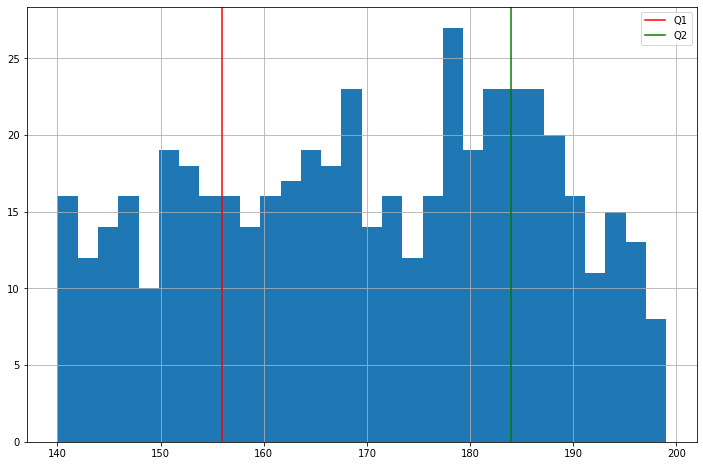

In [8]:
# Plot by using matplotlib
plt.figure(figsize =(12,8))
height_weight_data["Height"].hist(bins=30)
plt.axvline(q1_height,color='r', label = 'Q1')
plt.axvline(q3_height, color='g', label = 'Q2')
plt.legend()

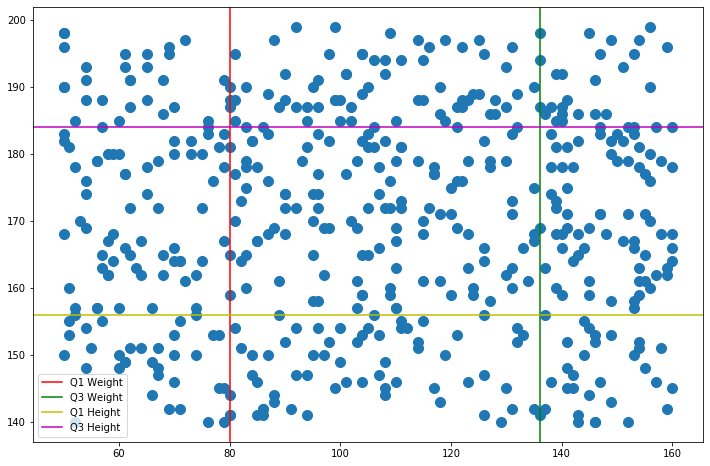

In [11]:
# Using single plot we can display IQR for height and weight

plt.figure(figsize = (12,8))
plt.scatter(height_weight_data["Weight"], height_weight_data["Height"], s=100)

plt.axvline(height_weight_data["Weight"].quantile(.25), color ="r", label = "Q1 Weight")
plt.axvline(height_weight_data["Weight"].quantile(.75), color ="g", label = "Q3 Weight")

plt.axhline(height_weight_data["Height"].quantile(.25), color ="y", label = "Q1 Height")
plt.axhline(height_weight_data["Height"].quantile(.75), color ="m", label = "Q3 Height")

plt.legend()



In [12]:
# Variance 
height_weight_data["Height"].var()

268.1491623246493

In [13]:
height_weight_data["Weight"].var()

1048.633266533066

In [14]:
# Standard Variance
## Standard Variance is nothing but the Squar root of the variance
std_height = (height_weight_data["Height"].var()) ** 0.5
std_height

16.375260679593755

In [15]:
std_weight = (height_weight_data["Weight"].var()) ** 0.5
std_weight

32.38260746964435

In [16]:
# There is another way we can calculate standard variance by using std()
height_weight_data["Height"].std()

16.375260679593755

In [17]:
height_weight_data["Weight"].std()

32.38260746964435

In [18]:
# Introduce some outliers to check case sensitivity for each dispertion

weight_mean = height_weight_data["Weight"].mean()
weight_std = height_weight_data["Weight"].std()
weight_mean, weight_std

(106.0, 32.38260746964435)

In [20]:
## now add some outliers
_data = [pd.Series(['Male', 40,30], index = height_weight_data.columns ),
        pd.Series(['Female', 66,37], index = height_weight_data.columns ),
        pd.Series(['Female', 199,410], index = height_weight_data.columns ),
        pd.Series(['Male', 202,390], index = height_weight_data.columns ),
        pd.Series(['Female', 77,210], index = height_weight_data.columns ),
        pd.Series(['Male', 88,203], index = height_weight_data.columns )
        ]

In [21]:
height_weight_updated =  height_weight_data.append(_data, ignore_index = True)
height_weight_updated.tail()

,Gender,Height,Weight
501,Female,66,37
502,Female,199,410
503,Male,202,390
504,Female,77,210
505,Male,88,203


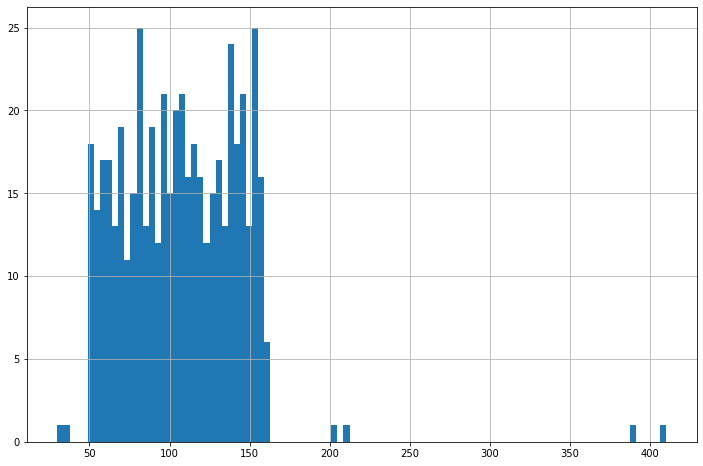

In [23]:
plt.figure(figsize=(12,8))
height_weight_updated["Weight"].hist(bins=100)

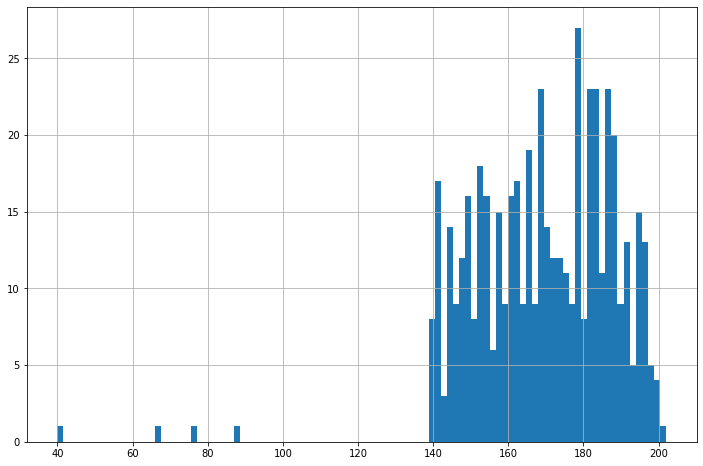

In [24]:
plt.figure(figsize=(12,8))
height_weight_updated["Height"].hist(bins=100)

In [26]:
height_weight_updated["Height"].quantile(.25)
# so adding outliers there is nothing change on q1

156.0

In [27]:
height_weight_updated["Height"].quantile(.75)
# so adding outliers there is nothing change on q3

184.0

In [28]:
IQR = height_weight_updated["Height"].quantile(.75) - height_weight_updated["Height"].quantile(.25)
IQR

28.0